In [1]:
import torch, torch.nn as nn, torch.optim as optim

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
tensor =torch.tensor([1,2,3])
print(tensor)


tensor([1, 2, 3])


In [11]:
import numpy as np
nparray = np.array([1,2,3,4,5,6])
tensor = torch.from_numpy(nparray)
print(tensor)
tensor2 = tensor.reshape(2,3)
print(tensor2)
print(tensor2.shape)
print(tensor2.size())


tensor([1, 2, 3, 4, 5, 6])
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
torch.Size([2, 3])


In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
train_ds = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = transform
)
test_ds = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = transform
)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.86MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 155kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.47MB/s]


In [13]:
train_loader = DataLoader(train_ds, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_ds, batch_size = 64, shuffle = False)

torch.Size([64, 1, 28, 28])


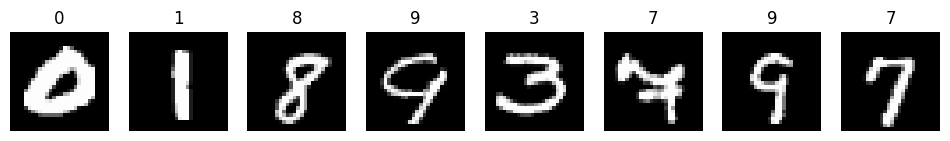

In [15]:
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))
print(images.size())
images = images[:8].squeeze()
fig, axes = plt.subplots(1,8,figsize=(12,2))
for ax, img, lbl in zip(axes, images, labels):
  ax.imshow(img, cmap = 'gray')
  ax.set_title(lbl.item())
  ax.axis('off')
plt.show()



In [17]:
model = nn.Sequential(nn.Flatten(),nn.Linear(28*28,128), nn.ReLU(), nn.Linear(128,64), nn.ReLU(), nn.Linear(64,10)).to(device)

In [ ]:
0    1    2
0.1  0.1 0.8


0    1   2
0.0 0.0 1.0

0.8

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)



In [19]:
def train_epoch(model, loader):
  model.train()
  running_loss = 0
  for X,y in loader:
    X,y = X.to(device),y.to(device)
    optimizer.zero_grad()
    pred = model(X)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*X.size(0)
  return running_loss/len(loader.dataset)

for epoch in range(5):
  loss = train_epoch(model,train_loader)
  print(f"Epoch: {epoch+1}, Loss: {loss:.4f}")


Epoch: 1, Loss: 0.7920
Epoch: 2, Loss: 0.3162
Epoch: 3, Loss: 0.2576
Epoch: 4, Loss: 0.2197
Epoch: 5, Loss: 0.1911
